In [5]:
import torch
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from model import ConvNet
from torchvision import transforms


In [6]:
# load model
model_state = torch.load('model.pth')
model = ConvNet()
model.load_state_dict(model_state)

<All keys matched successfully>

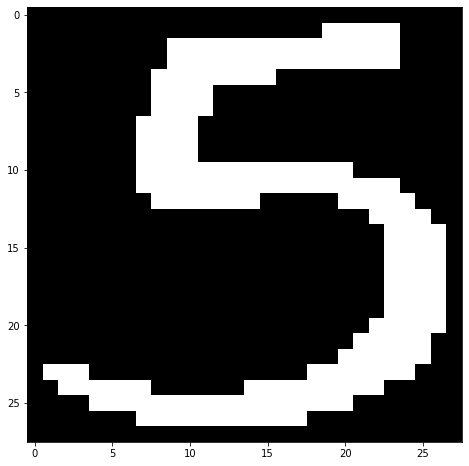

In [7]:
hand = cv2.imread("images\\5.png")
hand = cv2.resize(hand, (28, 28))
rgb_hand = cv2.cvtColor(hand, cv2.COLOR_BGR2RGB)
gray_hand = cv2.cvtColor(rgb_hand, cv2.COLOR_BGR2GRAY)
retval, dst = cv2.threshold(gray_hand, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
# erosion = cv2.erode(src = dst, kernel = kernel_cross)


filename = 'output.png'
cv2.imwrite(filename, dst)
plt.figure(figsize= (10, 8))
plt.imshow(dst, cmap="gray")

c:\Users\ritth\software\anaconda\envs\deep\lib\site-packages\torch\nn\functional.py:1320: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


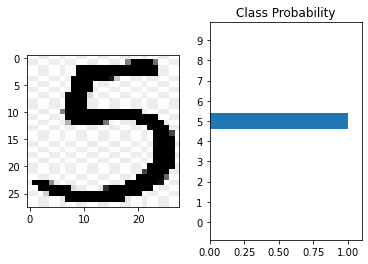

In [8]:
transformer = transforms.Compose([
                                   transforms.ToTensor(), 
                                   transforms.Normalize(mean=[(0.5)], std=[(0.5)])
                                 ])

dst = Image.open('output.png')
input_tensor = transformer(dst)
input_batch = input_tensor.unsqueeze(0)

model.eval()
with torch.no_grad():
        output = model.forward(input_batch)

probability = torch.nn.functional.softmax(output, dim=1)
probability = probability.numpy().squeeze()



plt.subplot(1,2,1)
plt.imshow(hand)
plt.subplot(1,2,2)
plt.barh(np.arange(10), probability)
plt.yticks(np.arange(10))
plt.title('Class Probability')
plt.xlim(0, 1.1)
plt.show()